# Geodatenanalyse 2


## Termin: Big Data 1 - Modul 1

## Umgang mit Datum und Zeit

Ca. 20-30 Minuten

## Inhalt
- Das Problem mit Zeitreihen
- Datums- und Zeitformate
- Python's eingebaute Datums- und Zeitfunktionalität
- Der Datums-/Zeit Datentyp in *NumPy*
- Operationen mit Datum oder Zeit
- Abbildungen mit Datum/Zeit-Achsen

In [1]:
import datetime as dt
import numpy as np
import matplotlib.pyplot as plt

## Was ist das Problem mit Zeitreihen?

### Die Zahlensysteme des Datums

- Ein Datum besteht aus einem komplizierten System: 

    - das Jahr hat 365 Tage, mit Schaltjahr 366 (alle 4 Jahre)
    
    - Die Tage variieren (28-31 Tage pro Monat)
    
    - Wochentage folgen dem 7-er System
    
    - Monate basieren auf der Basis von 12

### Die Zahlensysteme der Zeit

- Die Zeit besteht aus einem gemischten System:

    - Sekunden und Minuten auf der Basis von 60
    - Stunden auf der Basis von 24

### Welcher Speichertyp?

- Normale Datentypen wie z.B. *integer* oder *floats* werden generell für Berechnungen verwendet

- Man kann ein Datum und eine Zeit als *string* darstellen (z.B., "12.04.2021 12:33:44")

- Aber: Mit strings kann man keine Operationen (z.B. größer/kleiner Vergleiche) oder Berechnungen (z.B. Zeitdifferenz) durchführen

**Fazit**: Für die Zeitreihenanalyse brauchen wir einen eigenen Datentyp für Datum und Zeit!

In [2]:
datetime = "19.04.2021 14:10:10"
type(datetime)

str

### Was macht *Excel*?

Interne Umwandlung in eine Fließkommazahl (*float*):

<img src="figures\excel.png" alt="alt text" width="400" align="left"/>

- Die Ganzzahl ergibt die Tage (seit 1. Januar 1900)

- Die Fliesskommazahl ergibt die Zeiteinheit innerhalb des Tages

**Fazit**: Diese Strategie macht es etwas einfacher, aber nimmt nicht die Schwierigkeit aus dem Kalender!

## Datum/Zeit-Formate

### Das  ISO 8601 Datums- und Zeitformat

Quelle: [Wikipedia](https://de.wikipedia.org/wiki/ISO_8601)

<img src="figures\iso-8601.png" alt="alt text" width="600" align="left"/>

Mehr dazu in auf der [ISO Webseite](https://www.iso.org/iso-8601-date-and-time-format.html)

### Weitere wichtige Datum/Zeit-Formate

- Das internationale Format (Jahr zuerst): ``YYYY-mm-dd HH:MM:SS``

- Das internationale Format (Tag zuerst): ``dd/mm/YYYY HH:MM:SS``

- Das USA Format (Monat zuerst): ``mm/dd/YYYY HH:MM:SS`` (ACHTUNG: Verwechslungsgefahr!)

- Das deutsche Format: ``dd.mm.YYYY HH:MM:SS``


**ACHTUNG**: Daten haben oft ganz unterschiedliche und zum Teil auch vermischte Formate!


## Python's eingebaute Datums- und Zeitfunktionalität

- Das *datetime*-Modul liefert Klassen zur Manipulation von Datums- und Zeitangaben.

- Während die Datums- und Zeitarithmetik unterstützt wird, liegt der Schwerpunkt der Implementierung auf der effizienten Attributextraktion für die Ausgabeformatierung und -manipulation.


> Mehr Informationen im [Python Handbuch](https://docs.python.org/3/library/datetime.html)

### Eigenschaften des *date*-Objekts:

``datetime.date(year, month, day)``

In [3]:
date = dt.date.today()
date

datetime.date(2024, 4, 11)

In [4]:
time = dt.time(hour=14, minute=15, second=16)
time

datetime.time(14, 15, 16)

### Syntax des *datetime*-Objekts:

``datetime.datetime(year, month, day, hour=0, minute=0, second=0, microsecond=0, tzinfo=None)``

In [5]:
date = dt.datetime.today()
date

datetime.datetime(2024, 4, 11, 14, 6, 0, 770077)

### Import von vorformatierten Daten

- Oftmals müssen vorformatierte Daten in Python importiert werden

- Dafür gibt es die Funktion *strptime()* (p steht für *parsing*)

In [6]:
datum = "19.04.2021 14:33:12"
print(type(datum))

dt.datetime.strptime(datum, "%d.%m.%Y %H:%M:%S")

<class 'str'>


datetime.datetime(2021, 4, 19, 14, 33, 12)

Hier werden Schlüsselzeichen benötigt, welche den Zahlen ihren Platz zuweisen:


<img src="figures\datetime.png" alt="alt text" width="700" align="left"/>

### Export in ein formatiertes Format


- Andersrum müssen Daten aus Python exportiert werden

- Dafür gibt es die Funktion *strftime()* (f steht für *formatting*)

In [7]:
date = dt.datetime.now()
string = date.strftime("%Y-%m-%d %H:%M:%S")
print(string)
print(type(string))

2024-04-11 14:06:00
<class 'str'>


## Datums- und/oder Zeitrechnungen

- Manchmal muss ein Datum und/oder eine Zeit auch berechnet werden

- Dazu benötigt es ein eigenes Objekt

### Eigenschaften des *timedelta*-Objekts:

``datetime.timedelta(days=0, seconds=0, microseconds=0, milliseconds=0, minutes=0, hours=0, weeks=0)¶``

In [8]:
new_date = date + dt.timedelta(days=53)
new_date

datetime.datetime(2024, 6, 3, 14, 6, 0, 801458)

### Beispiel: Countdown bis zum nächsten Neujahr

In [9]:
countdown = dt.datetime(2024, 1, 1, hour=0, minute=0, second=0) - dt.datetime.now()
countdown

datetime.timedelta(days=-102, seconds=35639, microseconds=167959)

### *Frage*: Was ist mit Zeitreihen ...?

Dafür brauchen wir wieder einen anderen Datentyp!

## Der *datetime64[ns]* Datentyp in *NumPy*

- Das Datums-/Zeitobjekt von *NumPy* ist speziell für Zeitreihen entwickelt

- Damit lassen sich Vektoren bearbeiten

> Mehr Informationen im [*NumPy* Handbuch](https://numpy.org/doc/stable/reference/arrays.datetime.html)

In [10]:
date = np.datetime64('2021-04-12')
print(date)

dates = np.array(['2007-07-13', '2006-01-13', '2010-08-13'], dtype='datetime64')
print(dates)

2021-04-12
['2007-07-13' '2006-01-13' '2010-08-13']


### Rechnen mit Datum und Zeit

In [11]:
np.datetime64('2021-07-19') - np.datetime64('2021-04-19')

numpy.timedelta64(91,'D')

#### Was ist *timedelta64*?

Ein Datenobjekt für Datums- und Zeitdifferenzen!

Beispielrechnung:

In [12]:
np.datetime64('2021-07-19') + np.timedelta64(45, 'D') + np.timedelta64(13, 'h')

numpy.datetime64('2021-09-02T13','h')

In [13]:
datetime = np.datetime64('2021-07-19T12:33:35.456')
datetime

numpy.datetime64('2021-07-19T12:33:35.456')

In [14]:
datetime - np.timedelta64(23, 'D') + np.timedelta64(11, 'h') - np.timedelta64(34, 'm')

numpy.datetime64('2021-06-26T22:59:35.456')

### Zeitreihen erstellen

- Leider bietet *datetime* und *NumPy* nur begrenzte Funktionalität für das Erstellen von Zeitreihen

- Dazu braucht man dann Schleifen oder Iteratoren

In [15]:
base = np.datetime64('2021-01-01')
array = np.array(base)
for i in range(365):
    array = np.append(array, base + np.timedelta64(i + 1, 'D'))
    
array

array(['2021-01-01', '2021-01-02', '2021-01-03', '2021-01-04',
       '2021-01-05', '2021-01-06', '2021-01-07', '2021-01-08',
       '2021-01-09', '2021-01-10', '2021-01-11', '2021-01-12',
       '2021-01-13', '2021-01-14', '2021-01-15', '2021-01-16',
       '2021-01-17', '2021-01-18', '2021-01-19', '2021-01-20',
       '2021-01-21', '2021-01-22', '2021-01-23', '2021-01-24',
       '2021-01-25', '2021-01-26', '2021-01-27', '2021-01-28',
       '2021-01-29', '2021-01-30', '2021-01-31', '2021-02-01',
       '2021-02-02', '2021-02-03', '2021-02-04', '2021-02-05',
       '2021-02-06', '2021-02-07', '2021-02-08', '2021-02-09',
       '2021-02-10', '2021-02-11', '2021-02-12', '2021-02-13',
       '2021-02-14', '2021-02-15', '2021-02-16', '2021-02-17',
       '2021-02-18', '2021-02-19', '2021-02-20', '2021-02-21',
       '2021-02-22', '2021-02-23', '2021-02-24', '2021-02-25',
       '2021-02-26', '2021-02-27', '2021-02-28', '2021-03-01',
       '2021-03-02', '2021-03-03', '2021-03-04', '2021-

In [16]:
timeseries = np.arange(np.datetime64('2021-01-01 00:00:00'), np.datetime64('2021-12-31'))
timeseries
len(timeseries)

31449600

## Operationen mit Datum oder Zeit

- Für Zeitreihenanalysen benötigt man oft Logik-Operationen

- z.B. Vergleich: Ist ein Datum-/Zeit größer, kleiner oder gleich?

- oder, wie viele Objekte entsprechen einem Kriterium?

### Vergleiche

In [17]:
reference = np.datetime64('2021-04-12 12:33:00')

boolean = timeseries > reference

new_ts = timeseries[boolean]
new_ts

array(['2021-04-12T12:33:01', '2021-04-12T12:33:02',
       '2021-04-12T12:33:03', ..., '2021-12-30T23:59:57',
       '2021-12-30T23:59:58', '2021-12-30T23:59:59'],
      dtype='datetime64[s]')

In [18]:
reference = np.datetime64('2021-04-12 12:33:00')

idx = np.where(timeseries == reference)
idx

(array([8771580], dtype=int64),)

## Abbildungen mit Datum/Zeit

- Abbildungen mit *matplotlib* erkennen automatisch, ob ein Datum/Zeit-Objekt übergeben wurde
- Die Achsenbeschriftung wird auch automatisch übernommen

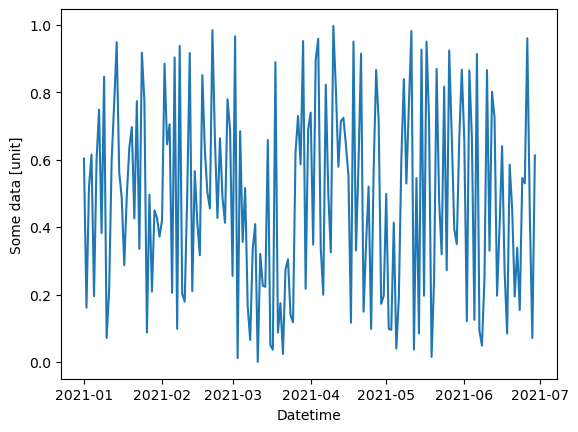

In [19]:
timeseries = np.arange(np.datetime64('2021-01-01'), np.datetime64('2021-06-30'))
data = np.random.rand(len(timeseries))

plt.plot(timeseries, data)
plt.xlabel('Datetime')
plt.ylabel('Some data [unit]')

plt.show()

### Beispiel: Bei der Achsenbeschriftung muss oder möchte man oft eingreifen

In [20]:
import matplotlib.dates as mdates

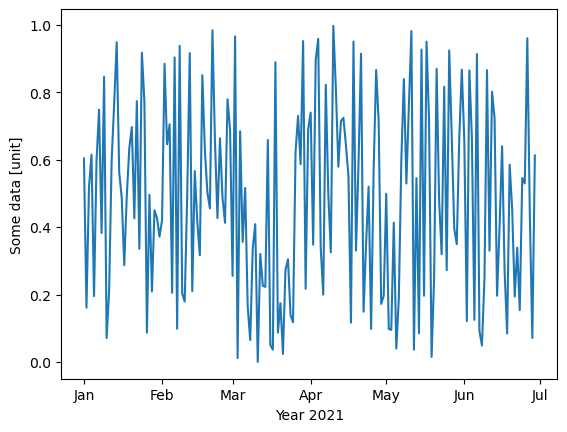

In [21]:
fig, ax = plt.subplots(1)
ax.plot(timeseries, data)
ax.set_xlabel('Year 2021')
ax.set_ylabel('Some data [unit]')

# custom formatting
ax.xaxis.set_major_formatter(mdates.DateFormatter('%b'))

plt.show()

## ENDE